In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

For this notebook of examples, we'll use the "Chicago Car Crash" dataset - https://www.kaggle.com/datasets/nathaniellybrand/chicago-car-crash-dataset] -  that contains historical data about car crashes in the city of Chicago.
<br>
<br>
*Note, we've not commited the dataset to the repo due to its size. Head over to the link above and extract the file onto your ./02_matplotlib/data folder*

In [3]:
# We'll start by loading the dataset into our environment
crash_data = pd.read_csv('./data/crashes.csv')

In [4]:
crash_data.head(10)

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,012c5bfce715efb2f2b387d6dd86f9c13e9dc1809fb52a...,JG341943,NaN,07/12/2023 03:05:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,2.0,0.0,15,4,7,41.778542,-87.742065,POINT (-87.742064741348 41.778541938106)
1,01d457f032e23d935a0b8f6b4c88221375180ffd4cd959...,JG338388,NaN,07/12/2023 05:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,17,4,7,41.742131,-87.721824,POINT (-87.72182410033 41.742130554062)
2,02249b4747a4bf40b88a8357304a98dfeaef9c38eebbf0...,JG350008,NaN,07/12/2023 02:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,OTHER OBJECT,...,0.0,0.0,1.0,0.0,14,4,7,41.719844,-87.584790,POINT (-87.584789974824 41.719844228292)
3,03e3b6caad71b78ed9ae325648effa9512bfb2517aed30...,JG338049,NaN,07/12/2023 07:05:00 AM,30,TRAFFIC SIGNAL,UNKNOWN,FREEZING RAIN/DRIZZLE,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,7,4,7,41.925105,-87.668291,POINT (-87.668291181568 41.925104953308)
4,0481fc919b38f1572d4ba04b069766102d904a662ff096...,JG338431,NaN,07/12/2023 06:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,18,4,7,41.975258,-87.751991,POINT (-87.751990557158 41.97525809527)
5,0500576055e3d46b0ed507761bfeae64457b1b58871f42...,JF345041,NaN,08/05/2022 09:25:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,2.0,0.0,9,6,8,41.912216,-87.661908,POINT (-87.661907974376 41.912215555223)
6,067575f551ac7df5aa918f14e1fb63daa10dcb0790d2a1...,JG337491,N,07/12/2023 02:45:00 AM,35,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,...,0.0,0.0,3.0,0.0,2,4,7,41.916056,-87.726674,POINT (-87.726673526828 41.91605579143)
7,07acb1d484e4c78c22307e80ec0daa51cb4f40a0499856...,JB443362,NaN,09/20/2018 11:10:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,0.0,2.0,0.0,11,5,9,41.911662,-87.661514,POINT (-87.66151368637 41.911661913381)
8,09205e5b5b761edc90dbd36ee25a883d1e18da617aa5b3...,JG338417,NaN,07/12/2023 05:50:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,...,0.0,0.0,7.0,0.0,17,4,7,41.931852,-87.638177,POINT (-87.638177073552 41.931852075785)
9,093fc24cf0d63df8bb9858e38fa8316e57a9e03188a608...,JG337865,Y,07/12/2023 11:00:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,11,4,7,42.021070,-87.672692,POINT (-87.672691723918 42.021069763335)


Let's start by plotting the the number of crashes per hour. This will give us an interesting view if there's a trend in each day. 
<br>
What is the plot type that you think that fits this scenario? 
<br>
<br>
The simpler option, and as we will have time on the `x-axis` is to use a line chart to plot the evolution: 

In [21]:
crashes_per_hour = crash_data.groupby('CRASH_HOUR', as_index=False).size()

Let's build our first `matplotlib` plot, by using `plt.plot`:

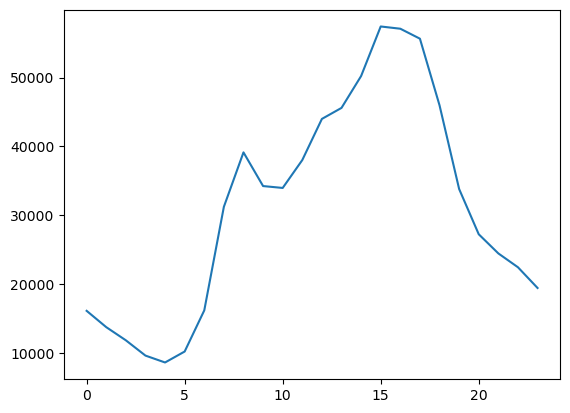

In [12]:
plt.plot(
    crashes_per_hour.CRASH_HOUR,
    crashes_per_hour['size']
)

Should we spice up our plot? Definitely! Let's add labels and title to our plot: 

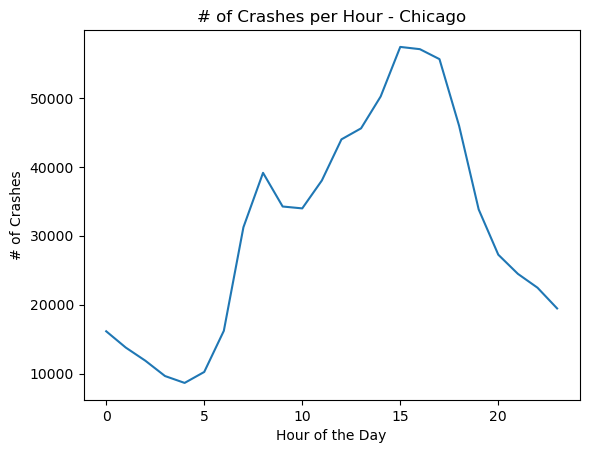

In [14]:
plt.plot(
    crashes_per_hour.CRASH_HOUR,
    crashes_per_hour['size']
)

plt.xlabel('Hour of the Day')
plt.ylabel('# of Crashes')
plt.title('# of Crashes per Hour - Chicago')

plt.show()

We can add stuff to our plot by continuously call `plt` methods, until a `plt.show()` shows up. When this line of code shows, `matplotlib` resets the plot window and all the instructions coming after it, will show in a new window. For instance, the `title` of the plot will show up in another plot if we use this sequence of `matplotlib` commands:

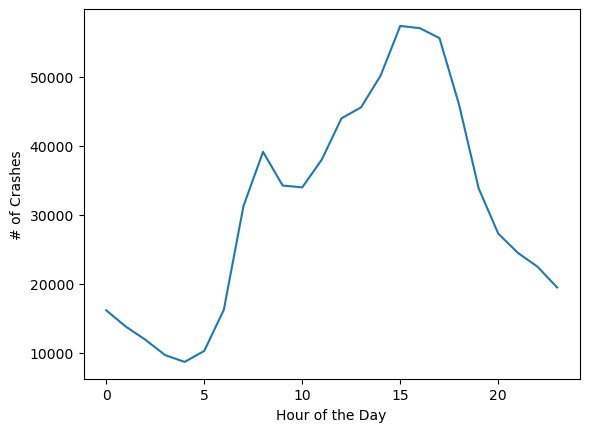

Text(0.5, 1.0, '# of Crashes per Hour - Chicago')

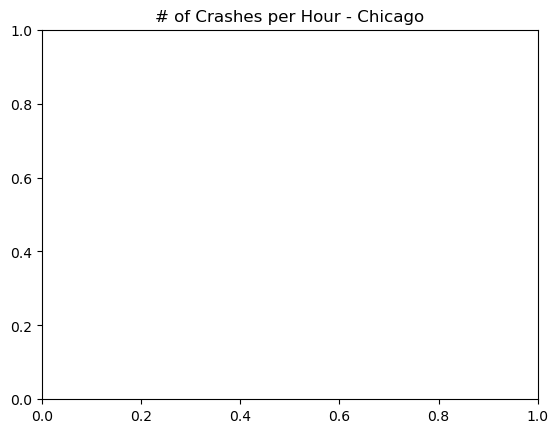

In [16]:
plt.plot(
    crashes_per_hour.CRASH_HOUR,
    crashes_per_hour['size']
)

plt.xlabel('Hour of the Day')
plt.ylabel('# of Crashes')

plt.show()


plt.title('# of Crashes per Hour - Chicago')

Arguably, we would be better off with a *cyclical plot* for plotting features related to hours. And this is one of the downsides of `matplotlib` - for certain plots it's just a little bit... annoying:

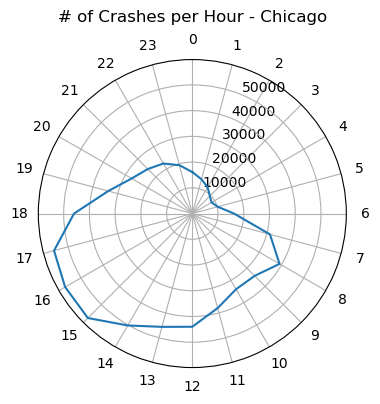

In [25]:
# a radar plot in matplotlib, or how to drive a developer insane

# Define the figure and axis
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, polar=True)
theta = np.linspace(0, 2 * np.pi, 24, endpoint=False)

# Array
hours = np.array(crashes_per_hour['CRASH_HOUR'])
sizes = np.array(crashes_per_hour['size'])

# Ensure that data is circular by adding the first value to the end of the array
hours = np.append(hours, hours[0])
sizes = np.append(sizes, sizes[0])
theta = np.append(theta, theta[0])

ax.plot(theta, sizes)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))
ax.set_xticklabels([str(i) for i in range(24)])

ax.set_title('# of Crashes per Hour - Chicago', va='bottom')
plt.show()

This is a very valid criticism to `matplotlib`. Some plots are just very complex to build. 

Let's continue exploring the library with other types of plots. For example, we could use a bar plot for this type of data:

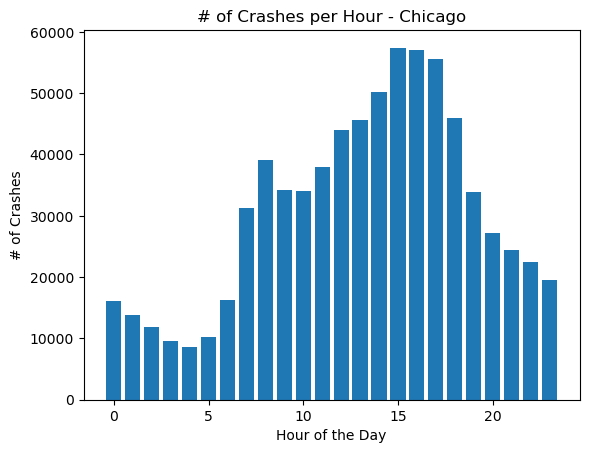

In [26]:
plt.bar(
    crashes_per_hour.CRASH_HOUR,
    crashes_per_hour['size']
)

plt.xlabel('Hour of the Day')
plt.ylabel('# of Crashes')
plt.title('# of Crashes per Hour - Chicago')

plt.show()



Normally, if there is continuous data in the `x-axis`, we would like to avoid this situation. Bar plots are better for sorted comparisons, and doing that, in this case, yields in an unnatural order of the hours: 

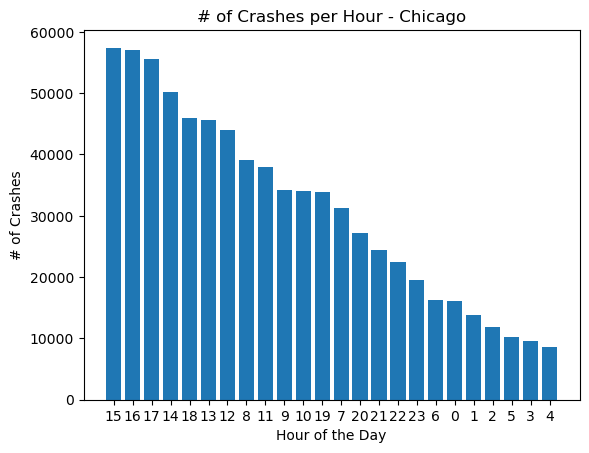

In [32]:
crashes_per_hour_sorted = crashes_per_hour.sort_values(
    by='size', 
    ascending=False
)

plt.bar(
    crashes_per_hour_sorted.CRASH_HOUR.astype(str),
    crashes_per_hour_sorted['size']
)

plt.xlabel('Hour of the Day')
plt.ylabel('# of Crashes')
plt.title('# of Crashes per Hour - Chicago')

plt.show()



Bar plots should be used when there is a "qualitative" `x-axis`. For example:

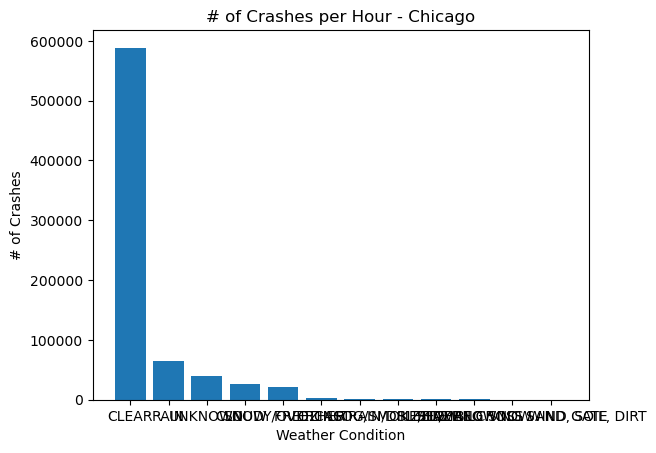

In [7]:
weather_condition = (
    crash_data.groupby('WEATHER_CONDITION')
    .size()
    .sort_values(ascending=False)
).reset_index()

weather_condition.columns = ['WEATHER_CONDITION', 'COUNT']

plt.bar(
    weather_condition.WEATHER_CONDITION,
    weather_condition['COUNT']
)

plt.xlabel('Weather Condition')
plt.ylabel('# of Crashes')
plt.title('# of Crashes per Hour - Chicago')


plt.show()


Eek! Look at those labels in the axis. Let's solve that! 

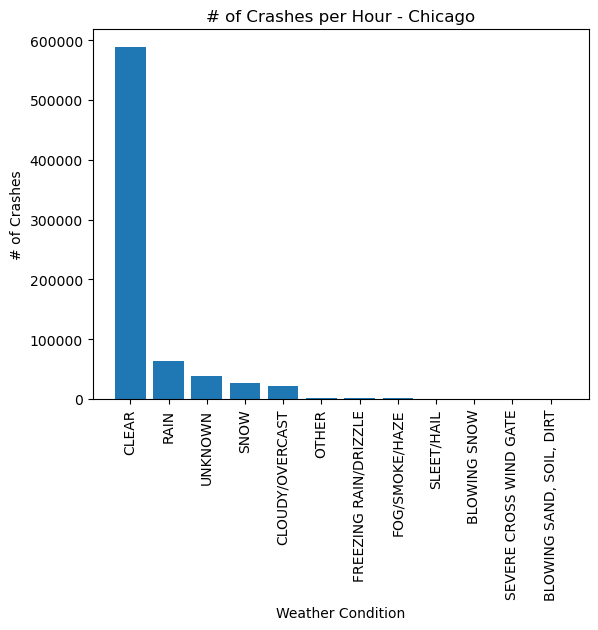

In [59]:
weather_condition = (
    crash_data.groupby('WEATHER_CONDITION')
    .size()
    .sort_values(ascending=False)
).reset_index()

weather_condition.columns = ['WEATHER_CONDITION', 'COUNT']

plt.bar(
    weather_condition.WEATHER_CONDITION,
    weather_condition['COUNT']
)

plt.xlabel('Weather Condition')
plt.ylabel('# of Crashes')
plt.title('# of Crashes per Hour - Chicago')

plt.xticks(rotation=90)

plt.show()


Most stuff in `matplotlib` plots is solved by invoking `plt.` methods! Some of them may be more complex than others, though.

Ok, now we now the context of where we can use bar plots. But is our plot conveying the right message? 
<br>
<br>
Nope! Our message right now is: most accidents happen on `CLEAR` days. Does that mean that when there is a clear sky, you will more likely to have an accident? 
<br>
<br> 
To clearly answer if it is more likely to have an accident when it rains, we would need to have data about the entire number of people driving in those days. We can try a proxy, though - comparing the average number of accidents per hour in Rainy Days vs. Clear Days:

In [14]:
# Transform CRASH DATE into datetime
crash_data['CRASH DATE'] = pd.to_datetime(
    crash_data.CRASH_DATE, 
    format='%m/%d/%Y %I:%M:%S %p'
)

In [34]:
# Extracting Date + Hour
crash_data['DATE'] = crash_data['CRASH DATE'].dt.strftime('%Y-%m-%d')

In [35]:
most_common_weather_condition = (crash_data.groupby(['DATE', 'WEATHER_CONDITION'])
               .size()
               .reset_index(name='count')
               .sort_values(['DATE', 'count'], ascending=[True, False])
               .drop_duplicates(subset='DATE'))

In [39]:
# Extract number of crashes

number_crashes_per_day = (
    crash_data.groupby('DATE', as_index=False).size()
)

In [42]:
number_crashes_per_day

,DATE,size
0,2013-03-03,1
1,2013-06-01,1
2,2014-01-18,1
3,2014-01-21,1
4,2014-02-24,1
...,...,...
2947,2023-07-26,242
2948,2023-07-27,290
2949,2023-07-28,331
2950,2023-07-29,276


In [51]:
# Exclude some outliers
number_crashes_per_day = (
    number_crashes_per_day.loc[number_crashes_per_day['size'] > 1]
    )

In [53]:
number_accidents_weather_condition = (
    most_common_weather_condition[['DATE','WEATHER_CONDITION']]
    .merge(number_crashes_per_day, on = 'DATE')
)

In [55]:
number_accidents_weather_condition.groupby(['WEATHER_CONDITION'])['size'].mean()

WEATHER_CONDITION
CLEAR    252.677359
RAIN     281.611111
SNOW     296.443038
Name: size, dtype: float64

In [28]:
# https://python-graph-gallery.com/best-python-chart-examples/

,DATE HOUR,WEATHER_CONDITION,count
0,2013-03-03 16,CLEAR,1
1,2013-06-01 20,CLEAR,1
2,2014-01-18 18,CLEAR,1
3,2014-01-21 07,CLEAR,1
4,2014-02-24 19,RAIN,1
...,...,...,...
127969,2023-07-30 16,CLEAR,13
127970,2023-07-30 17,CLEAR,11
127971,2023-07-30 18,CLEAR,8
127973,2023-07-30 19,CLEAR,11
